# Custom Models & Sklearn+PyTorch

In [1]:
%run "002d_nnsetup_class_objects.ipynb"

output dir reset
Loading fundus dir: ../../data/stare_fundus
one-hot shape:  (15, 15)


,fname,fpath,ishape,imin,imax,imean,istd,dcodez_id,dcodez_short,dcodez_desc,...,BDR-NPDR,PDR,ASR,HTR,Coats,MA,CNV,UNDEF,dclass,dclass_v
count,397,397,397,397.000000,397.000000,397.000000,397.000000,397,397,397,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397,397.000000
unique,397,397,1,NaN,NaN,NaN,NaN,48,48,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,im0032,../../data/stare_fundus/im0397.ppm,"(605, 700, 3)",NaN,NaN,NaN,NaN,14,UNDEF,Unknown Diagnosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sick,NaN
freq,1,1,397,NaN,NaN,NaN,NaN,90,90,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202,NaN
mean,NaN,NaN,NaN,0.065491,253.967254,83.071825,73.856816,NaN,NaN,NaN,...,0.176322,0.057935,0.083123,0.090680,0.035264,0.020151,0.153652,0.400504,NaN,1.115869
std,NaN,NaN,NaN,0.247703,6.358915,15.154158,13.368342,NaN,NaN,NaN,...,0.381575,0.233914,0.276417,0.287516,0.184680,0.140694,0.361070,0.495739,NaN,0.943706
min,NaN,NaN,NaN,0.000000,179.000000,49.365399,31.962128,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,255.000000,72.793943,66.022203,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,0.000000,255.000000,81.432149,76.270379,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000
75%,NaN,NaN,NaN,0.000000,255.000000,92.292583,83.227167,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2.000000


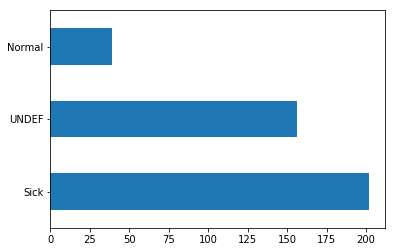

In [2]:
OUTPUTDIR = "output_02"
## 1. Reset Output Dir
def purge_dir(dpath):    
    for f in glob.glob(f'{dpath}/*.png'):
        os.remove(f)         
purge_dir(OUTPUTDIR)
print('output dir reset')
## 2. Setup dataset 
NUM_CLASSES = 3
CLASS_LABELZ = ['UnDef', 'Normal', 'Sick']

idf3 = PdDataStats()
idf3.load_stare_fundus_dir( )

t = YLabelzFundusTransformer()
idf3.dframe = t.transform(idf3.dframe)

idf3.summarize()
idf3.visualize('dclass', plt_type='barh', countz=True, stacked=False)

In [3]:
nmax = 30 
dftmp = idf3.dframe.sample(nmax) 
fetcher = FileContentFetcherMixin() 
detailz = ['fname', 'dclass','dcodez_short']
fundz_zrecordz = []
for i, fp in enumerate( fetcher.file_content( dftmp,vcolz=detailz) ): 
    fp[0].remap_fundus_img()
    fundz_zrecordz.append(fp) 
print(len(fundz_zrecordz))
# _ = [print(type(r), type(r[0]), r[0].remapped_data[0].shape) for r in fundz_zrecordz]


30


In [4]:
reshaped = fundz_zrecordz[0][0].remapped_data[0].shape
piper_procs = [
        ('fundusor', StareFundusTransformer()),
        ('force2d', Force2DTransformer()), ## flatten 
        ('rescaler', StandardScaler()),
        #('pca_dim', PCA(n_components=10) ), 
    ]
preproc_piper = Pipeline(piper_procs)
transformed_fmapz = preproc_piper.fit_transform( dftmp )
model_inputz = (np.array(transformed_fmapz).copy())
# _ = [print(type(fp)) for fp in transformed_fmapz]

transformed_fmapz = [fp.reshape( (*reshaped, -1)) for fp in transformed_fmapz]

# print( len( transformed_fmapz) )
# for i, fp in enumerate(transformed_fmapz):
#     print( f"{(i+1)}: { type(fp)}, {fp.shape}" )
# #     plot_funduz(fp[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1: im0012 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0012_UNDEF_fmap


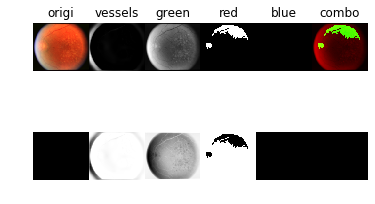

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


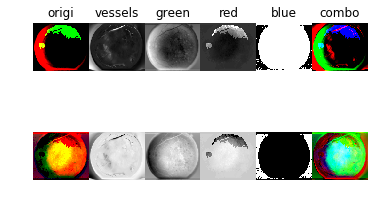

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2: im0309 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0309_Sick_fmap


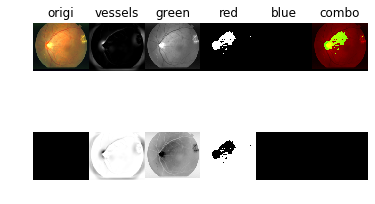

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


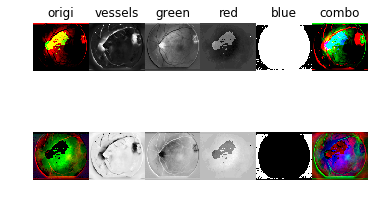

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3: im0340 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0340_Sick_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


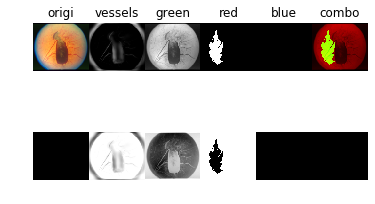

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


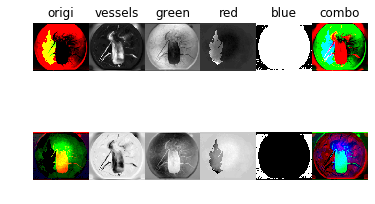

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4: im0345 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0345_Sick_fmap


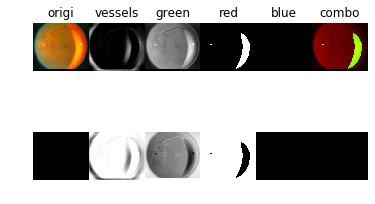

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


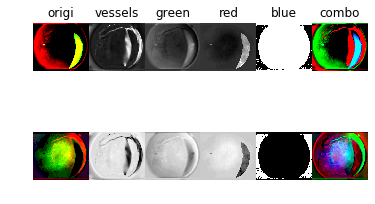

5: im0156 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0156_Sick_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


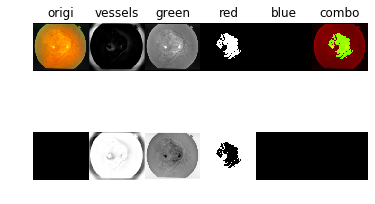

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


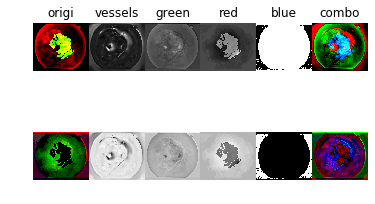

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6: im0058 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0058_Sick_fmap


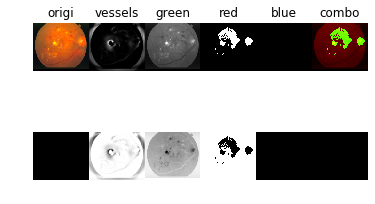

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


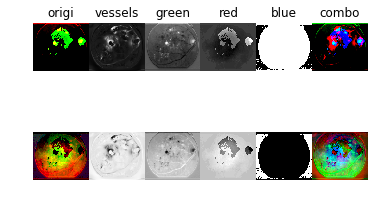

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7: im0221 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0221_UNDEF_fmap


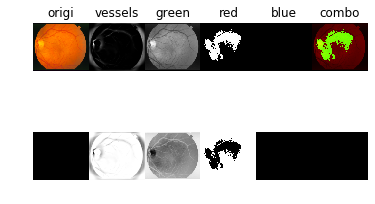

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


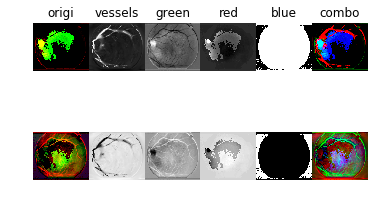

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8: im0149 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0149_UNDEF_fmap


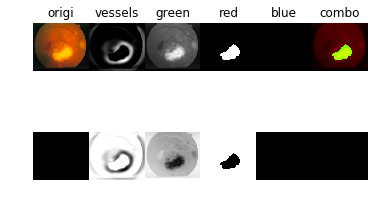

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


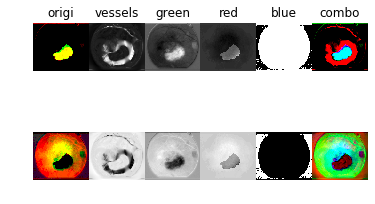

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9: im0006 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0006_UNDEF_fmap


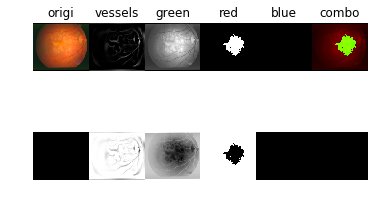

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


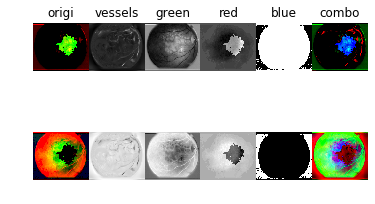

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10: im0346 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0346_Sick_fmap


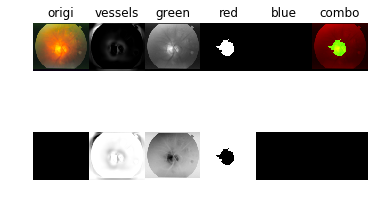

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


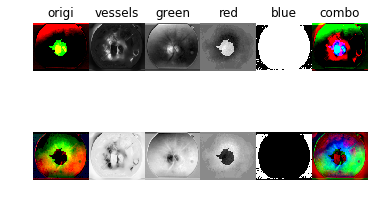

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11: im0173 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0173_UNDEF_fmap


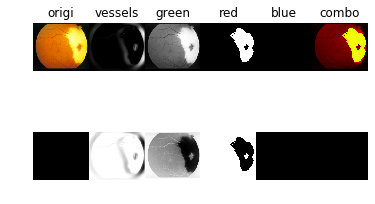

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


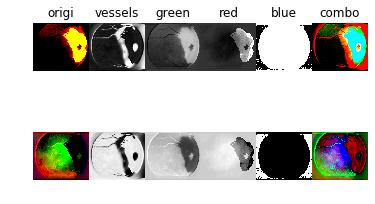

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12: im0165 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0165_Sick_fmap


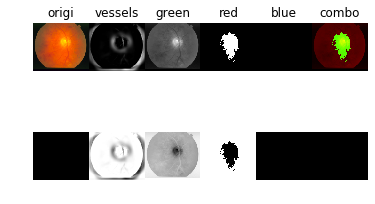

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


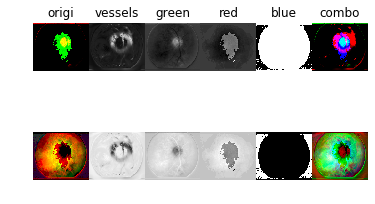

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13: im0396 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0396_Sick_fmap


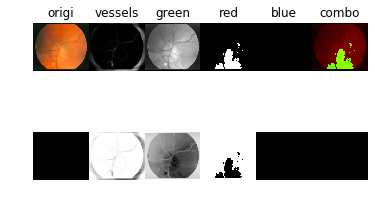

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


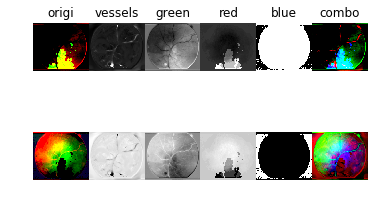

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14: im0377 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0377_UNDEF_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


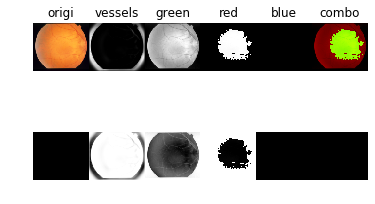

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


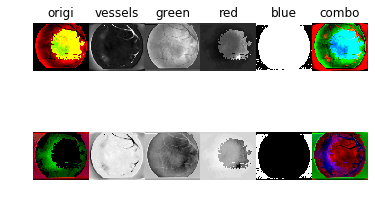

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15: im0101 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0101_Sick_fmap


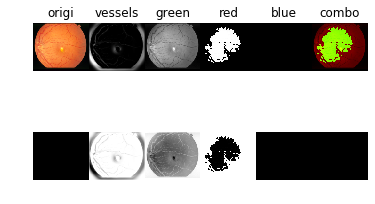

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


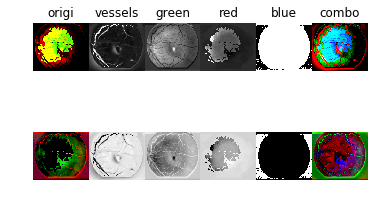

16: im0159 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0159_UNDEF_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


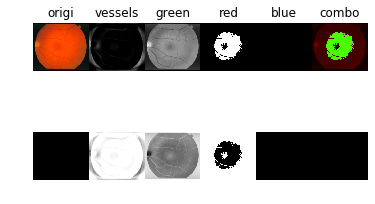

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


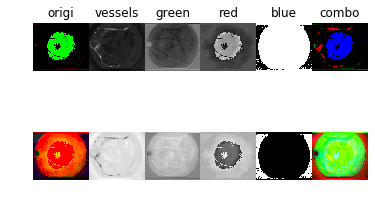

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17: im0161 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0161_Sick_fmap


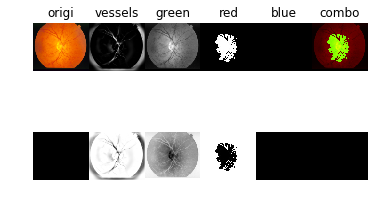

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


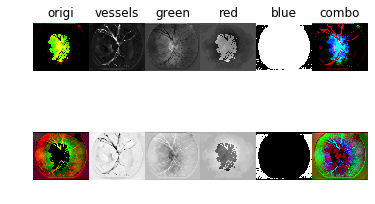

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18: im0028 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0028_Sick_fmap


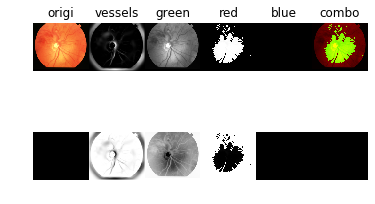

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


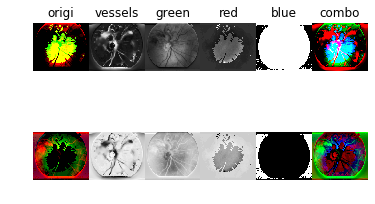

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19: im0123 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0123_Sick_fmap


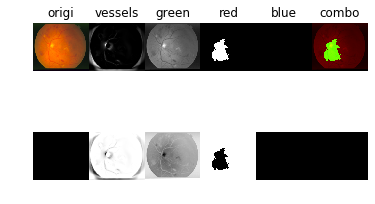

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


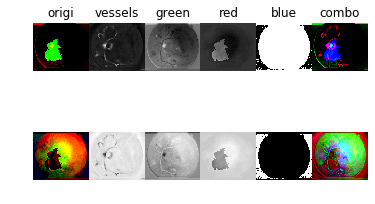

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20: im0048 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0048_Sick_fmap


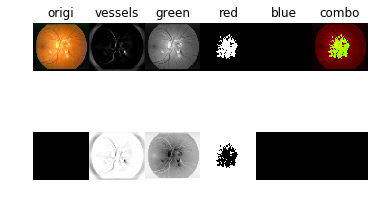

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


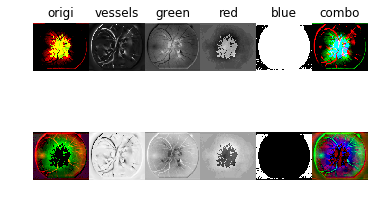

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


21: im0220 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0220_Sick_fmap


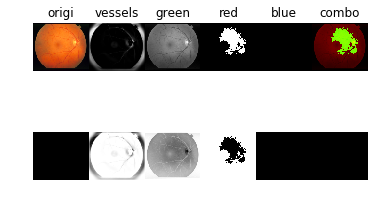

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


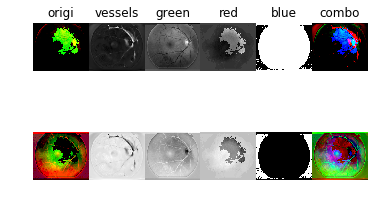

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


22: im0261 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0261_UNDEF_fmap


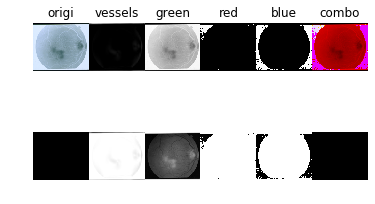

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


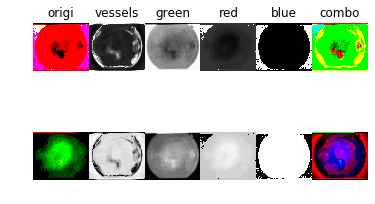

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23: im0333 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0333_Sick_fmap


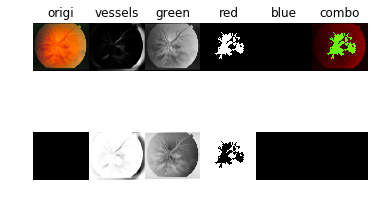

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


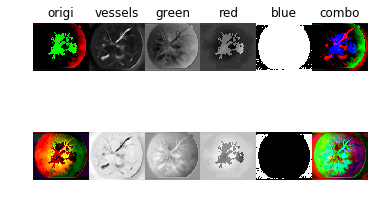

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24: im0078 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0078_UNDEF_fmap


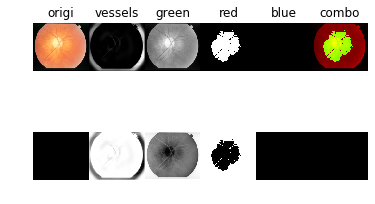

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


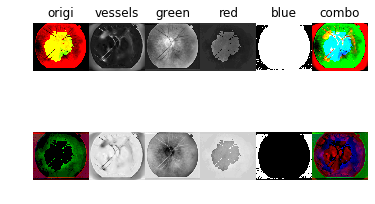

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25: im0239 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0239_Normal_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


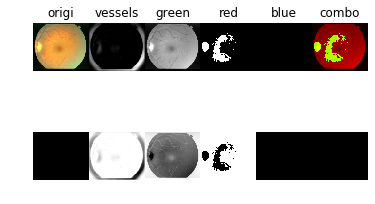

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


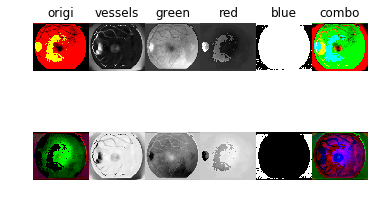

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


26: im0244 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0244_Normal_fmap


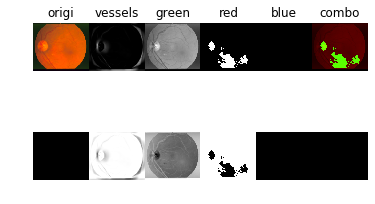

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


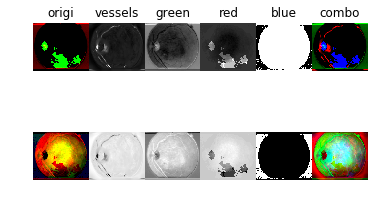

27: im0135 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0135_Sick_fmap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


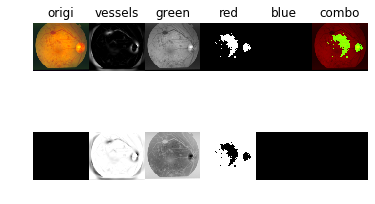

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


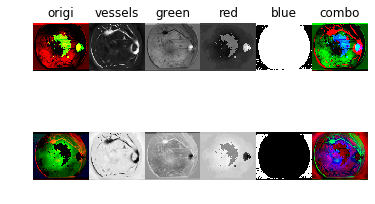

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28: im0093 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0093_Sick_fmap


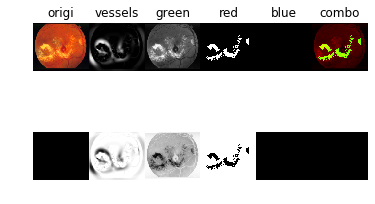

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


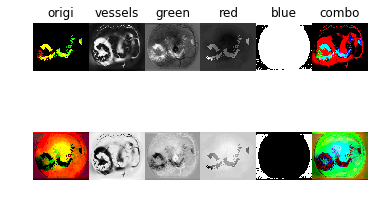

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


29: im0125 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0125_Sick_fmap


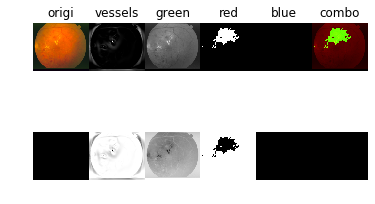

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


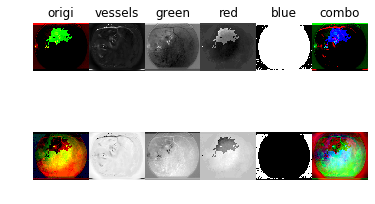

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


30: im0154 === <class '__main__.ZFundusImage'>:(151, 175, 3), <class 'numpy.ndarray'>:(151, 175, 4)
working on  im0154_UNDEF_fmap


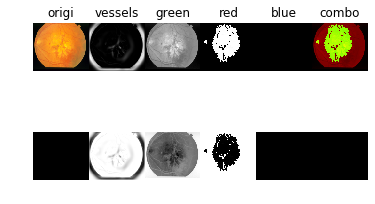

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


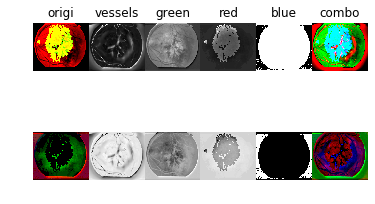

In [5]:
def plot_funduz(lbl, fp, rfp):
    kk =  rfp[:,:,1:]
    _,_,nc = rfp.shape
    #print(rfp.shape, "==>", kk.shape)
      
    fname = f"{lbl}_fmap"
    print('working on ', fname)
    
    ## 1. before scaling et al 
    tx = ['origi', 'vessels', 'green', 'red', 'blue', 'combo']
    imgz = [fp.data, *fp.remapped_data]  
    ZUtilz.plot_images_list(imgz+[-im for im in imgz], 
                            titlez=tx, nc=len(imgz), cmap='gray',
                            save=fname, tdir=OUTPUTDIR)
    ## 2. with scaling et al 
    #print(rfp.shape)
    imgz = [kk,]+[rfp[:,:,c] for c in range(nc)]+[ rfp[:,:,:3]]    
    ZUtilz.plot_images_list(imgz+[-im for im in imgz], 
                            titlez=tx, nc=len(imgz), cmap='gray',
                            save=fname+"_rescaled", tdir=OUTPUTDIR )
    
for i, samp in enumerate( zip(fundz_zrecordz, transformed_fmapz) ):
    fp, rfp = samp
    print( f"{(i+1)}: {fp[1].label} === {type(fp[0])}:{fp[0].data.shape}, {type(rfp)}:{rfp.shape}" )
    plot_funduz( '_'.join(fp[1].data[:2]), fp[0], rfp)

21
(22, 105700) (22,)
(8, 105700) (8,)


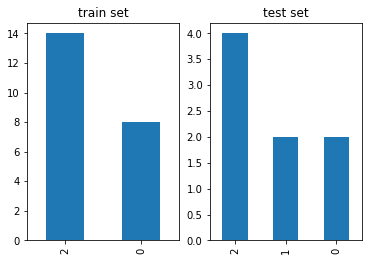

In [6]:
train_samples = len(dftmp)

n_train = int(0.70*train_samples)
print(n_train)

train_X, train_y = model_inputz[:(n_train+1)], dftmp['dclass_v'][:(n_train+1)]
test_X, test_y = model_inputz[(n_train+1):], dftmp['dclass_v'][(n_train+1):]
print( train_X.shape, train_y.shape)
print( test_X.shape, test_y.shape)

train_samples = len(train_X)
logit_m = LogisticRegression(C=50./train_samples, penalty='l1', 
                                   solver='saga', tol=0.00001, 
                                   multi_class='multinomial', 
                                   verbose=2, random_state=9)

plt.subplot(1,2,1)
train_y.value_counts().plot(kind='bar',stacked=False); 
plt.title('train set')
plt.subplot(1,2,2)
test_y.value_counts().plot(kind='bar',stacked=False); 
plt.title('test set'); 
plt.show();

In [7]:
logit_m.fit(train_X, train_y)


sparsity = np.mean( logit_m.coef_ == 0) * 100 
score = logit_m.score(test_X, test_y)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 9 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


LogisticRegression(C=2.272727272727273, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l1',
          random_state=9, solver='saga', tol=1e-05, verbose=2,
          warm_start=False)

Sparsity with L1 penalty: 68.11%
Test score with L1 penalty: 0.1250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


b4:  (105700,), aft: (151, 175, 4)


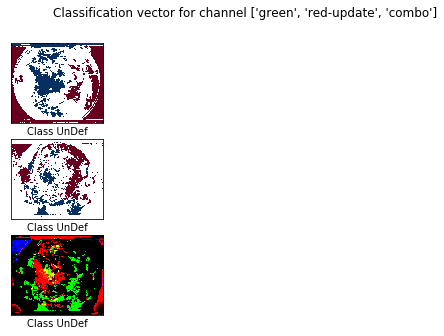

In [8]:
COEF = logit_m.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(COEF).max()
for i in range( NUM_CLASSES ):
    try:
        print('b4: ', COEF[i].shape , end=', ')
        cim = COEF[i].reshape((151, 175, -1))
        print('aft:', cim.shape )
        for c in [1,2,3]:
            ccm = 1/cim[:,:,c]*1 if c != 3 else cim[:,:,1:]/cim[:,:,:c]
            l1_plot = plt.subplot(3, 3, (i+1)+(3*(c-1)) ) 
            l1_plot.imshow(ccm, interpolation='nearest',
                           cmap=plt.cm.RdBu, vmin=-scale, vmax=scale) #
            l1_plot.set_xticks(())
            l1_plot.set_yticks(())
            l1_plot.set_xlabel( f'Class {CLASS_LABELZ[i]}' )
    except:
        pass

plt.suptitle(f"Classification vector for channel {['green','red-update', 'combo']}")

# run_time = time.time() - t0
# print('Example run in %.3f s' % run_time)

#d = datetime.now().strftime("%H%M%S")
plt.savefig( f'{OUTPUTDIR}/logit_res_{score}.png' , dpi=1200)
plt.show();

# TL with VGG, ResNet, Inception, MobileNet

- https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/ 
- https://keras.io/api/applications/


In [9]:
import keras
from keras.layers import Dense, Flatten, Input 
from keras.models import Model  

## --- TL typez
# from keras.applications.vgg16 import VGG16
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50
# from keras.applications.mobilenet_v2 import MobileNetV2

## preprocessing according to imagenet etc @ TL
from keras.applications import vgg16 # import preprocess_input, decode_predictions
from keras.applications import inception_v3 
from keras.applications import resnet50  
from keras.applications import mobilenet_v2  
from keras.applications import densenet
from keras.applications import nasnet 




#TODO: send keras to torch 
import torch

Using TensorFlow backend.


In [10]:
#idf3.dframe.head(3)
def get_final_model_tl_as_is(tl_model, t_input_shape, n_classes ):
    # remove classifier/top and load with imagenet intialization
    # if no top then must define input_tensor arg 
    t_input = Input(shape=t_input_shape)
    # A model without a top will output activations of the last convolution or pooling layer directly
    # suo yi: add a global pooling layer e.g. max/avg to get a vector     
    model = tl_model(weights='imagenet', #default, None=retrain from scratch, 
                    include_top=False, 
                    input_tensor=t_input,
                    #input_shape=t_input_shape,
                    pooling='avg', #global pooling layer
                    classes=n_classes #resize last layer output classes 
                   )
    return model

def get_final_model_tl_as_extractor_preproc(n_inputs, n_classes, tl_model, act_func):
    tlm = tl_model()
    model = Model(inputs=tlm.inputs, outputs=tlm.layers[-2].output )    
    return model

def get_final_model_tl_as_extactor_in_another(n_inputs, n_classes, tl_model, act_func='relu'):
    tlm = tl_model(include_top=False, input_shape=n_inputs)
    flat = Flatten()(tlm.layers[-1].output)
    classes = Dense(1024, activation=act_func)(flat)
    output = Dense(n_classes, activation='softmax')(classes)
    
    # now combine and freeze weights 
    model = Model(inputs=tlm.inputs, outputs=output)
    for l in model.layers:
        l.trainable = False  #freeze weights 
    
    return model 

def train_model(model, data, epochs=3, 
                optimizer='rmsprop',
                loss='categorical_cross_entropy'):
    model.compile(optimzer=optimizer,  loss=loss)
    
    model.fit()
    
        
    
def reshape_img_to_tl(img, preprocessor, tsize):  
    img = skimage.transform.resize(img ,tsize, anti_aliasing=True)
    img = img.reshape((1,*img.shape))
    img = preprocessor(img)
    return img 
    
def predict(img, model, preprocessor, topn=3, tsize=(224,224)): ##remember to imagnet reshape  TODO: fix 1000 Vs sub  
    img = reshape_img_to_tl(img, preprocessor.preprocess_input, tsize)
    yhat = model.predict(img)
    ylbl = preprocessor.decode_predictions(yhat, top=topn)[0]
    return yhat, ylbl 
    

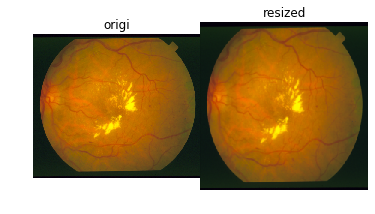

In [11]:
sample_zrec = next(idf3.file_content)
sample_origin_img = sample_zrec[0].data
eg = skimage.transform.resize(sample_origin_img, (224,224), anti_aliasing=True)
sample_shape_classes = (sample_origin_img.shape, 3)
imgz = [sample_origin_img, eg]
tx = ['origi', 'resized']
ZUtilz.plot_images_list(imgz, titlez=tx, nc=len(imgz), cmap='gray',)

In [12]:
vggmodel = get_final_model_tl_as_is(vgg16.VGG16, *sample_shape_classes)
## TODO: predict (1,512 ) Vs (1,1000)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
argz = {'weights':'imagenet'} 



tsize = [(224, 224), (224, 224), (299, 299), (224, 224), 
         (224, 224), (224, 224), (331, 331)]
preprocz = [vgg16, resnet50, inception_v3, mobilenet_v2, 
            densenet, nasnet, nasnet]
modz = [vgg16.VGG16, resnet50.ResNet50, inception_v3.InceptionV3, mobilenet_v2.MobileNetV2, 
        densenet.DenseNet121, nasnet.NASNetMobile, nasnet.NASNetLarge,]
mlblz = ['vgg16', 'resnet50', 'inception_v3', 'mobilenet_v2',
         'densenet', 'nasnet-mobile', 'nasnet-large']
for i, mod in enumerate(modz):
    m = mod(**argz)
    lm = mlblz[i] #m.__class__
    predz, lblz = predict(sample_origin_img, m, preprocz[i], tsize=tsize[i])
    print(f"{i+1}. {lm}: {predz.shape}")  
    _ = [ print(f'\t{l}') for l in lblz ] 
    print("----" )

1. vgg16: (1, 1000)
	('n03729826', 'matchstick', 0.075994894)
	('n01930112', 'nematode', 0.047881775)
	('n03666591', 'lighter', 0.030687852)
----
2. resnet50: (1, 1000)
	('n06359193', 'web_site', 0.06047109)
	('n01930112', 'nematode', 0.04534203)
	('n03196217', 'digital_clock', 0.036008336)
----
3. inception_v3: (1, 1000)
	('n01930112', 'nematode', 0.1292317)
	('n03729826', 'matchstick', 0.07664637)
	('n03196217', 'digital_clock', 0.039327875)
----
4. mobilenet_v2: (1, 1000)
	('n04286575', 'spotlight', 0.3039632)
	('n03729826', 'matchstick', 0.035763774)
	('n03196217', 'digital_clock', 0.034215204)
----
5. densenet: (1, 1000)
	('n03729826', 'matchstick', 0.14782709)
	('n04286575', 'spotlight', 0.05868089)
	('n01930112', 'nematode', 0.02615967)
----
6. nasnet-mobile: (1, 1000)
	('n03196217', 'digital_clock', 0.053690325)
	('n01930112', 'nematode', 0.052763678)
	('n03729826', 'matchstick', 0.021745147)
----
7. nasnet-large: (1, 1000)
	('n01930112', 'nematode', 0.112840086)
	('n03196217',